You have to submit two Assignment problems using data files: systemAdministrators , RidingMovers: You must conduct some EDA analysis and run Logistic regression model.


# Q1) Identifying Good System Administrators.

A management consultant is studying the roles played by experience and training in a system administrator’s ability to complete a set of tasks in a specified amount of time. In particular, she is interested in discriminating between administrators who are able to complete given tasks within a specified time and those who are not. Data are collected on the performance of 75 randomly selected administrators. They are stored in the file SystemAdministrators.csv.

The variable Experience measures months of full-time system administrator experience, while Training measures the number of relevant training credits. The outcome variable Completed is either Yes or No, according to whether or not the administrator completed the tasks.

In [376]:
# Importing standard libraries

%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import plotnine as p9
import statsmodels.api as sm



In [377]:
#load data and assign it to a variable

system_df = pd.read_csv("/Users/superman/Desktop/Education/MBA/Semester-V/BUSI 650/Assignment/SystemAdministrators.csv")
system_df

,Experience,Training,Completed task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes
...,...,...,...
70,5.6,4,No
71,5.9,8,No
72,6.4,6,No
73,3.8,4,No


In [378]:
# Display total count of rows and columns

system_df.shape

(75, 3)

In [379]:
# describing the data 
system_df.describe()

,Experience,Training
count,75.000000,75.000000
mean,6.800000,4.613333
std,2.273645,1.184281
min,2.700000,4.000000
25%,5.200000,4.000000
50%,6.300000,4.000000
75%,7.850000,4.000000
max,13.700000,8.000000


In [380]:
# replacing space between characters between the columns to avoid future errors

system_df.columns =[s.strip().replace(' ', '_') for s in system_df.columns]
system_df.head()

,Experience,Training,Completed_task
0,10.9,4,Yes
1,9.9,4,Yes
2,10.4,6,Yes
3,13.7,6,Yes
4,9.4,8,Yes


In [381]:
system_df.columns # print the list of variables

Index(['Experience', 'Training', 'Completed_task'], dtype='object')

In [382]:
# Completed_task needs to converted to categorical variable

system_df.Completed_task = system_df.Completed_task.astype('category')

In [383]:
# Show number of categories

system_df.Completed_task.cat.categories # show number of categories

Index(['No', 'Yes'], dtype='object')

In [384]:
system_df.columns

Index(['Experience', 'Training', 'Completed_task'], dtype='object')

In [385]:
# Using dummies categorizing into 1, 0 through 


systemnew_df = pd.get_dummies(system_df[["Experience", "Training","Completed_task"]])
systemnew_df

,Experience,Training,Completed_task_No,Completed_task_Yes
0,10.9,4,0,1
1,9.9,4,0,1
2,10.4,6,0,1
3,13.7,6,0,1
4,9.4,8,0,1
...,...,...,...,...
70,5.6,4,1,0
71,5.9,8,1,0
72,6.4,6,1,0
73,3.8,4,1,0


In [386]:
systemnew_df.value_counts("Completed_task_No")

Completed_task_No
1    60
0    15
dtype: int64

In [387]:
systemnew_df.value_counts("Completed_task_Yes")

Completed_task_Yes
0    60
1    15
dtype: int64

In [388]:
systemnew_df.describe()

,Experience,Training,Completed_task_No,Completed_task_Yes
count,75.000000,75.000000,75.000000,75.000000
mean,6.800000,4.613333,0.800000,0.200000
std,2.273645,1.184281,0.402694,0.402694
min,2.700000,4.000000,0.000000,0.000000
25%,5.200000,4.000000,1.000000,0.000000
50%,6.300000,4.000000,1.000000,0.000000
75%,7.850000,4.000000,1.000000,0.000000
max,13.700000,8.000000,1.000000,1.000000


In [389]:
# Verify for missing data

systemnew_df.isna().sum()

Experience            0
Training              0
Completed_task_No     0
Completed_task_Yes    0
dtype: int64

In [390]:
# percentage of Completed task Yes

a = (systemnew_df['Completed_task_Yes'].sum()/systemnew_df['Completed_task_Yes'].count())*100
a

20.0

In [391]:
# percentage of Completed task Yes

b = (systemnew_df['Completed_task_No'].sum()/systemnew_df['Completed_task_No'].count())*100
b

80.0

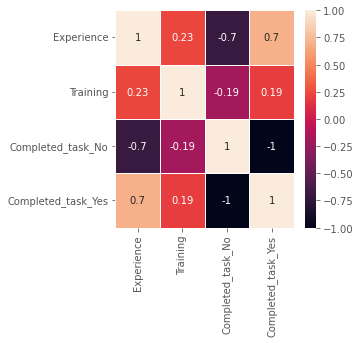

In [392]:
# Correlation - Experience and Training are correlated with completed task is 0.7 and 0.19. Experience has higher weightage
fig, ax = plt.subplots(figsize=(4,4))
corl = systemnew_df.corr()
sns.heatmap(corl, annot=True,linewidths=.5, ax=ax);

<AxesSubplot:>

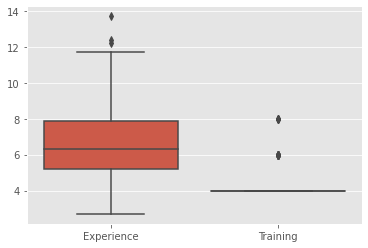

In [393]:
# box plot to understand the quartile information and skewness. 
# we can we have few outlier in both experience and training categories. 

sns.boxplot(data=system_df)

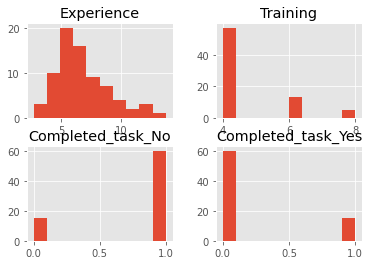

In [394]:
# Histogram information on each of the numerical data points to understand the spread.
# data disribution through histogram provides clear understanding on the data spread and at what value or level

systemnew_df.hist();

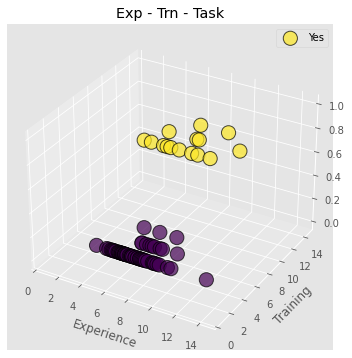

In [395]:
# 3D presentation of Experience, Training and Completed Task Yes - 

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = systemnew_df["Experience"]
y = systemnew_df["Training"]
z = systemnew_df["Completed_task_Yes"]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x , y , z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)

plt.title("Exp - Trn - Task")
plt.legend(["Yes", "No"])
plt.xlabel("Experience")
plt.ylabel("Training")
plt.xlim( [ 0, 15 ] )          # Plot from x=0 to .
plt.ylim( [ 0, 15 ] )
plt.show()

/var/folders/1m/f2k96v8n1593g1zbd0kng35c0000gn/T/ipykernel_69589/1213775746.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


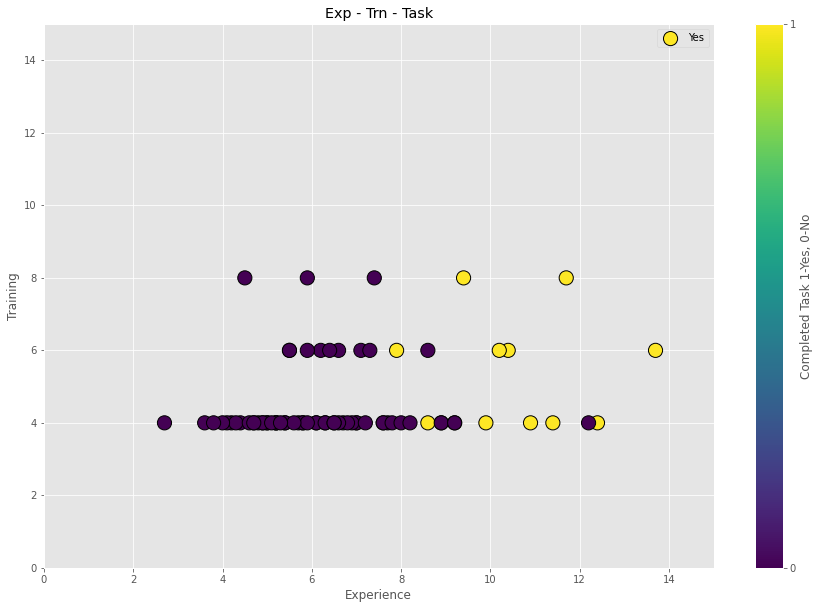

In [396]:
# 2D presentation of Experience, Training and Completed Task Yes or No


x = systemnew_df["Experience"]
y = systemnew_df["Training"]
z = systemnew_df["Completed_task_Yes"]

fig = plt.figure(figsize=(15, 10))
plt.scatter(x, y,
           linewidths=1, alpha=None,
           edgecolor='k',
           s = 200,
           c=z)

plt.title("Exp - Trn - Task")
plt.legend(["Yes", "No"])
plt.xlabel("Experience")
plt.ylabel("Training")
plt.xlim( [ 0, 15 ] )          # Plot from x=0 to .
plt.ylim( [ 0, 15 ] )


bar=plt.colorbar(label ="Completed Task 1-Yes, 0-No")
bar.set_ticks([0,1])


plt.show()

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0.5, 1.0, 'Household Classification of Riding Mowers'),
 Text(0.5, 0, 'LotSize in 1000ft2'),
 Text(0, 0.5, 'Income in $1000s')]

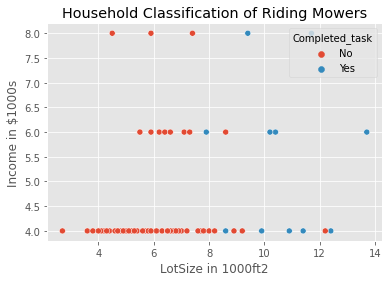

In [398]:
# scatter plot using seaborn

sns.scatterplot('Experience', 'Training', hue='Completed_task', data=system_df).set(title = 'Household Classification of Riding Mowers', xlabel = 'LotSize in 1000ft2', ylabel = 'Income in $1000s')


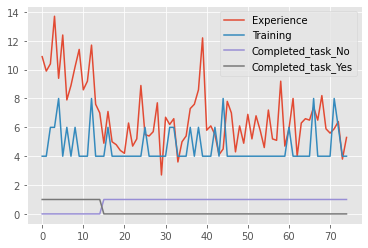

In [329]:
# Using ggplot listing the data frame to understand yes and No values for the experience and training combination

plt.style.use("ggplot")
systemnew_df.plot();

In [399]:
# Model selection - logisticRegression

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


#setup random seed

np.random.seed(42)

x = systemnew_df.drop(["Completed_task_No","Completed_task_Yes"], axis =1)
y = systemnew_df["Completed_task_Yes"]

# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3)

#instantiate logisticRegression classififer

log = LogisticRegression()

#Fit the model to the data - training

result = log.fit(x_train, y_train)

# Evalute the logisticRegression classifier - use the patterns to the model 

log.score(x_test, y_test)

0.9130434782608695

In [400]:
print('intercept ', log.intercept_[0])
print(pd.DataFrame({'coeff': log.coef_[0]}, index=x.columns).transpose())

intercept  -10.808577612241322
       Experience  Training
coeff    1.203749    0.0567


In [403]:
y_test

4     1
63    0
10    1
0     1
35    0
61    0
28    0
12    1
69    0
64    0
34    0
42    0
49    0
18    0
9     1
22    0
5     1
33    0
56    0
66    0
39    0
40    0
16    0
Name: Completed_task_Yes, dtype: uint8

In [401]:
# predict_proba() returns probabilites of a classification label

log.predict_proba(x_test[:5])

array([[0.27682574, 0.72317426],
       [0.95249092, 0.04750908],
       [0.55713374, 0.44286626],
       [0.07316321, 0.92683679],
       [0.9833987 , 0.0166013 ]])

In [333]:
# Predicting the score x_test using logistics regression model

y_preds = log.predict(x_test)

np.mean(y_preds == y_test)

0.9130434782608695

In [334]:
y_preds

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0], dtype=uint8)

In [335]:
np.array(y_test)

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0], dtype=uint8)

In [336]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9130434782608695

In [337]:
# confusion maxtix 

confusion_matrix(y_test, log.predict(x_test))


array([[16,  1],
       [ 1,  5]])

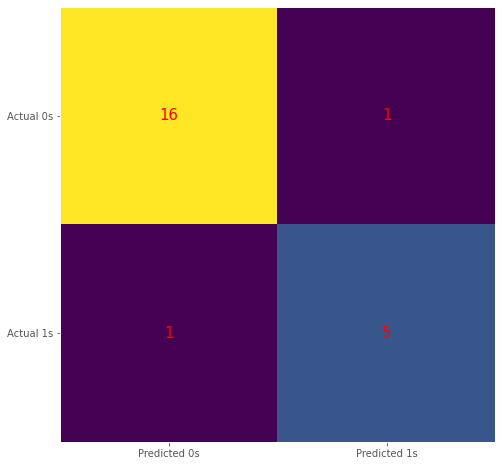

In [338]:
# confusion matrix, helps us understand how well the prediction were vs the actual


cf = confusion_matrix(y_test, log.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cf[i, j], ha='center', va='center', color='red', fontsize = 15)
plt.show()

In [339]:
# r2 value - The better model has higher R2 value
from sklearn.metrics import r2_score

coeffscore = r2_score(y_test, y_preds)

coeffscore

0.5490196078431371

In [340]:
 # precision    recall  f1-score   support
    
#Precision	Precision is defined as the ratio of true positives to the sum of true and false positives.
#Recall	Recall is defined as the ratio of true positives to the sum of true positives and false negatives.
#F1 Score	The F1 is the weighted harmonic mean of precision and recall. The closer the value of the F1 score is to 1.0, the better the expected performance of the model is.
#Support	Support is the number of actual occurrences of the class in the dataset. It doesn’t vary between models, it just diagnoses the performance evaluation process.


print(classification_report(y_test, log.predict(x_test)))


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        17
           1       0.83      0.83      0.83         6

    accuracy                           0.91        23
   macro avg       0.89      0.89      0.89        23
weighted avg       0.91      0.91      0.91        23



 # Q2) Sales of Riding Mowers.

## A company that manufactures riding mowers wants to identify the best sales prospects for an intensive sales campaign. In particular, the manufacturer is interested in classifying households as prospective owners or nonowners on the basis of Income (in $1000s) and Lot Size (in 1000 ft2). The marketing expert looked at a random sample of 24 households, given in the file RidingMowers.csv. Use all the data to fit a logistic regression of ownership on the two predictors.



In [341]:
#importing data

sales_df = pd.read_csv('/Users/superman/Desktop/Education/MBA/Semester-V/BUSI 650/Assignment/RidingMowers.csv')
sales_df.head()

,Income,Lot_Size,Ownership
0,60.0,18.4,Owner
1,85.5,16.8,Owner
2,64.8,21.6,Owner
3,61.5,20.8,Owner
4,87.0,23.6,Owner


In [342]:
sales_df.shape

(24, 3)

In [343]:
# columns do not have any space, so we do not have to use strip replace process to correct the data


# replacing space between characters between the columns to avoid future errors

# sales_df.columns =[s.strip().replace(' ', '_') for s in system_df.columns]
# sales_df.head()

In [344]:
sales_df.describe()

,Income,Lot_Size
count,24.000000,24.000000
mean,68.437500,18.950000
std,19.793144,2.428275
min,33.000000,14.000000
25%,52.350000,17.500000
50%,64.800000,19.000000
75%,83.100000,20.800000
max,110.100000,23.600000


In [345]:

# Verify for missing data
sales_df.isna().sum()

Income       0
Lot_Size     0
Ownership    0
dtype: int64

In [346]:
sales_df.columns

Index(['Income', 'Lot_Size', 'Ownership'], dtype='object')

In [347]:
# Owner needs to converted to categorical variable

sales_df.Ownership = sales_df.Ownership.astype('category')

In [348]:
# Show number of categories

sales_df.Ownership.cat.categories # show number of categories

Index(['Nonowner', 'Owner'], dtype='object')

In [349]:
# converting target section i.e "Ownership" to numerical using dummy method

# Using dummies categorizing into 1, 0 through 


salesnew_df = pd.get_dummies(sales_df[['Income', 'Lot_Size', 'Ownership']])
salesnew_df.head()

,Income,Lot_Size,Ownership_Nonowner,Ownership_Owner
0,60.0,18.4,0,1
1,85.5,16.8,0,1
2,64.8,21.6,0,1
3,61.5,20.8,0,1
4,87.0,23.6,0,1


In [350]:
salesnew_df.isna().sum()


Income                0
Lot_Size              0
Ownership_Nonowner    0
Ownership_Owner       0
dtype: int64

In [351]:
# check for na values

salesnew_df.Ownership_Nonowner.sum()


12

In [352]:
salesnew_df.Ownership_Owner.sum()

12

In [353]:
salesnew_df.describe()

,Income,Lot_Size,Ownership_Nonowner,Ownership_Owner
count,24.000000,24.000000,24.000000,24.000000
mean,68.437500,18.950000,0.500000,0.500000
std,19.793144,2.428275,0.510754,0.510754
min,33.000000,14.000000,0.000000,0.000000
25%,52.350000,17.500000,0.000000,0.000000
50%,64.800000,19.000000,0.500000,0.500000
75%,83.100000,20.800000,1.000000,1.000000
max,110.100000,23.600000,1.000000,1.000000


In [354]:
# percentage of Owners

a = (salesnew_df['Ownership_Owner'].sum()/salesnew_df['Ownership_Owner'].count())*100
a

50.0

In [355]:
# percentage of NonOwners

b = (salesnew_df['Ownership_Nonowner'].sum()/salesnew_df['Ownership_Nonowner'].count())*100
b

50.0

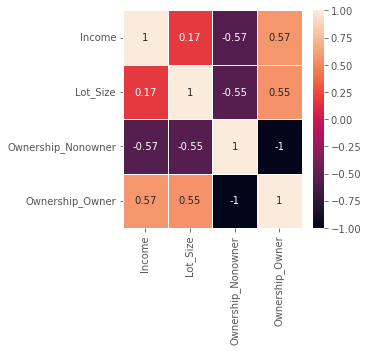

In [356]:
# Correlation - Income and lotsize are correlated with ownership between 50 to 60%

fig, ax = plt.subplots(figsize=(4,4))
corl = salesnew_df.corr()
sns.heatmap(corl, annot=True,linewidths=.5, ax=ax);

<AxesSubplot:>

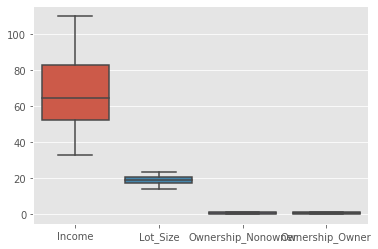

In [357]:
# box plot to understand the quartile information and skewness

sns.boxplot(data=salesnew_df)

/var/folders/1m/f2k96v8n1593g1zbd0kng35c0000gn/T/ipykernel_69589/1741966020.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.


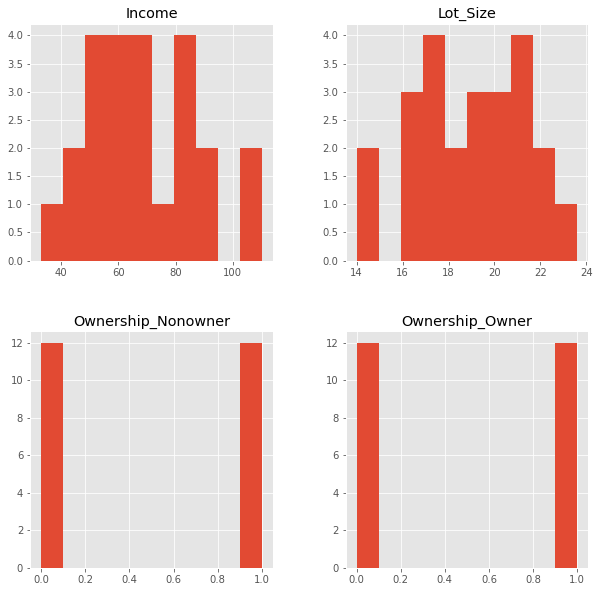

In [358]:
# Histogram information on each of the numerical data points to understand the spread


fig = plt.figure(figsize = (10,10))
ax = fig.gca()
salesnew_df.hist(ax = ax);

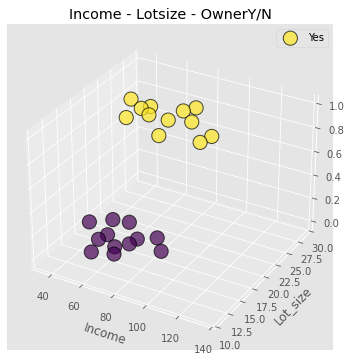

In [359]:
# 3D presentation of Income, Lotsize and Ownership_Owner

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

x = salesnew_df["Income"]
y = salesnew_df["Lot_Size"]
z = salesnew_df["Ownership_Owner"]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x , y , z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=z)

plt.title("Income - Lotsize - OwnerY/N")
plt.legend(["Yes", "No"])
plt.xlabel("Income")
plt.ylabel("Lot_size")
plt.xlim( [ 30, 140 ] )          # Plot from x=0 to .
plt.ylim( [ 10, 30 ] )
plt.show()

/var/folders/1m/f2k96v8n1593g1zbd0kng35c0000gn/T/ipykernel_69589/194813591.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.


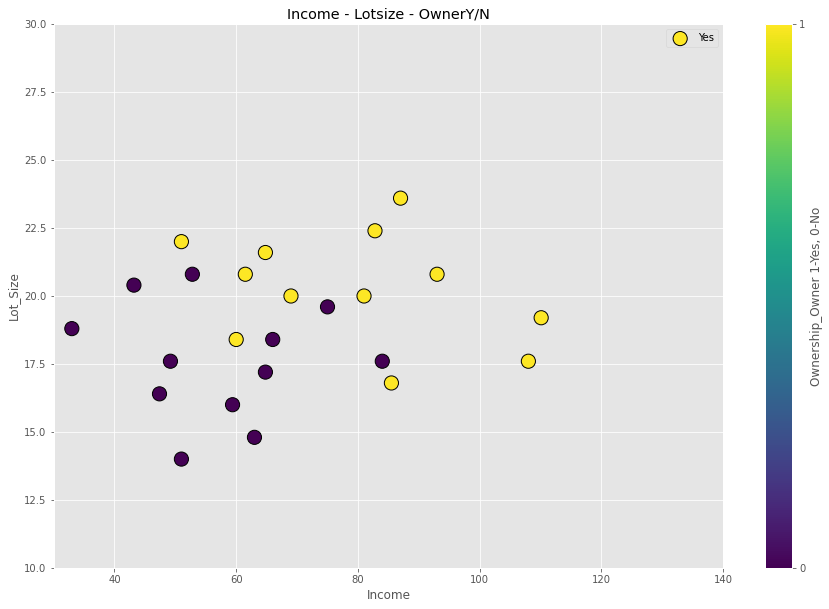

In [360]:
# 2D presentation of Experience, Training and Completed Task Yes or No


x = salesnew_df["Income"]
y = salesnew_df["Lot_Size"]
z = salesnew_df["Ownership_Owner"]

fig = plt.figure(figsize=(15, 10))
plt.scatter(x, y,
           linewidths=1, alpha=None,
           edgecolor='k',
           s = 200,
           c=z)

plt.title("Income - Lotsize - OwnerY/N")
plt.legend(["Yes", "No"])
plt.xlabel("Income")
plt.ylabel("Lot_Size")
plt.xlim( [ 30, 140 ] )          # Plot from x=30 to 140 .
plt.ylim( [ 10, 30 ] )           # Plot from x=10 to 30 .


bar=plt.colorbar(label ="Ownership_Owner 1-Yes, 0-No")
bar.set_ticks([0,1])


plt.show()

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


[Text(0.5, 1.0, 'Household Classification of Riding Mowers'),
 Text(0.5, 0, 'LotSize in 1000ft2'),
 Text(0, 0.5, 'Income in $1000s')]

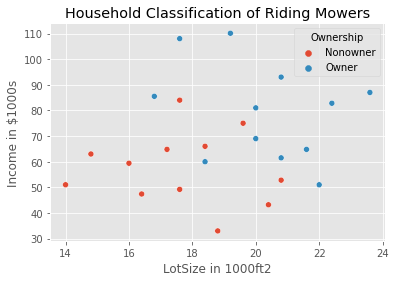

In [361]:
# scatter plot using seaborn

sns.scatterplot('Lot_Size', 'Income', hue='Ownership', data=sales_df).set(title = 'Household Classification of Riding Mowers', xlabel = 'LotSize in 1000ft2', ylabel = 'Income in $1000s')


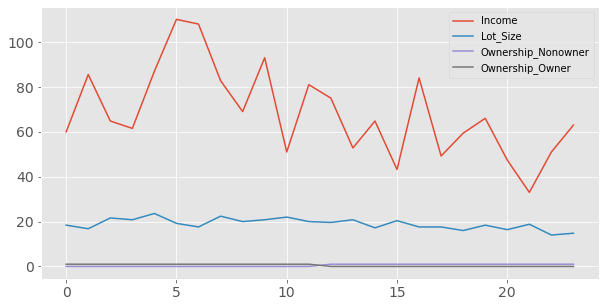

In [362]:
# Using ggplot listing the data frame to understand owner and Noowner values for the income and lotsize combination
plt.style.use("ggplot")
salesnew_df.plot(figsize = (10,5), fontsize = 14, );



In [363]:
salesnew_df.columns

Index(['Income', 'Lot_Size', 'Ownership_Nonowner', 'Ownership_Owner'], dtype='object')

In [372]:
# Model selection - logisticRegression

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split


#setup random seed

np.random.seed(42)

x = salesnew_df.drop(["Ownership_Nonowner","Ownership_Owner"], axis =1)
y = salesnew_df["Ownership_Owner"]

# split the data into training and test

x_train, x_test, y_train, y_test = train_test_split(x,y)

#instantiate logisticRegression classififer

log = LogisticRegression()

#Fit the model to the data - training

log.fit(x_train, y_train)

# Evalute the logisticRegression classifier - use the patterns to the model 

log.score(x_test, y_test)




0.6666666666666666

In [373]:
print('intercept ', log.intercept_[0])
print(pd.DataFrame({'coeff': log.coef_[0]}, index=x.columns).transpose())

intercept  -26.6259389058989
         Income  Lot_Size
coeff  0.138668  0.890398


In [366]:
# predict_proba() returns probabilites of a classification label

log.predict_proba(x_test[:5])

array([[0.32079698, 0.67920302],
       [0.33332671, 0.66667329],
       [0.87242109, 0.12757891],
       [0.9843682 , 0.0156318 ],
       [0.08210171, 0.91789829]])

In [367]:
# confusion maxtix 

confusion_matrix(y_test, log.predict(x_test))


array([[1, 1],
       [1, 3]])

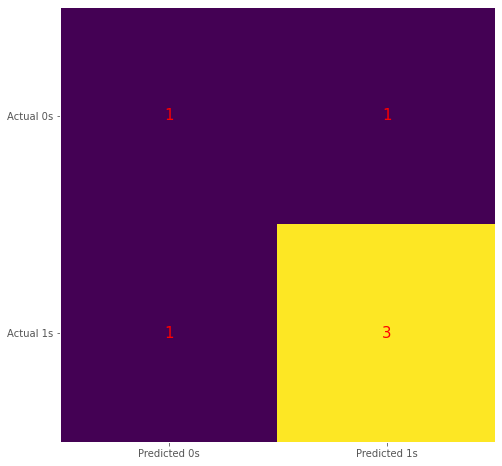

In [368]:
cf = confusion_matrix(y_test, log.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cf)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cf[i, j], ha='center', va='center', color='red', fontsize = 15)
plt.show()

In [369]:
sales_df.describe()

,Income,Lot_Size
count,24.000000,24.000000
mean,68.437500,18.950000
std,19.793144,2.428275
min,33.000000,14.000000
25%,52.350000,17.500000
50%,64.800000,19.000000
75%,83.100000,20.800000
max,110.100000,23.600000


In [370]:
# New data



predict_df = pd.DataFrame({'Income' : [60, 50, 71, 75, 80, 85, 90 ], 'Lot_Size' : [21, 25, 19, 30, 15, 19, 13]} )
predict_df
                    
# 71 and 19 are the threshold combined values above which model predicts ownership / with- income and lotsize contribute by 50 to 60% of correlation

,Income,Lot_Size
0,60,21
1,50,25
2,71,19
3,75,30
4,80,15
5,85,19
6,90,13


In [371]:
# predit output
y_pred = log.predict(predict_df)
y_pred

array([1, 1, 1, 1, 0, 1, 0], dtype=uint8)

In [303]:
 # precision    recall  f1-score   support


print(classification_report(y_pred, log.predict(predict_df)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         5

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7



In [1]:
pip install imbalanced-learn

     |████████████████████████████████| 199 kB 965 kB/s eta 0:00:01
You should consider upgrading via the '/Users/superman/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 961 kB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 22.0.3
    Uninstalling pip-22.0.3:
      Successfully uninstalled pip-22.0.3
Note: you may need to restart the kernel to use updated packages.


In [3]:
# check version number
import imblearn
print(imblearn.__version__)

0.9.0


In [2]:
from sklearn.model_selection import train_test_split
import yfinance as yf
from sklearn.linear_model import LinearRegression


df = yf.download('AAPL',
                 start='2020-01-01',
                 end='2021-12-31',
                 progress=False)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.894325,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.175926,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.759010,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.412117,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.593040,132079200
...,...,...,...,...,...,...
2021-12-23,175.850006,176.850006,175.270004,176.279999,176.055695,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.100540,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.061859,79144300
